In [3]:
import pandas as pd
import nltk
import string
import re
import codecs
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance, distance_matrix, minkowski_distance
import numpy as np

from sklearn.neighbors import DistanceMetric
from sklearn.metrics import pairwise_distances

pd.set_option('display.max_colwidth', 100)

## Read in data

### Czytania

In [4]:
df_readings = pd.read_csv('df_readings.csv', header=0, index_col=0, sep=';')
df_readings.head()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2019-02-03,Sunday,"Za panowania Jozjasza Pan skierował do mnie następujące słowo: ""Zanim ukształtowałem cię w łonie...","Będę wysławiał pomoc Twoją, Panie","W Tobie, Panie, ucieczka moja, niech wstydu nie zaznam na wieki. Wyzwól mnie i ratuj w Twej spra...","Starajcie się o większe dary, a ja wam wskażę drogę jeszcze doskonalszą. Gdybym mówił językami l...","Pan posłał Mnie, abym ubogim niósł dobrą nowinę, więźniom głosił wolność.","Kiedy Jezus przyszedł do Nazaretu, przemówił do ludu w synagodze: ""Dziś spełniły się te słowa Pi..."
2019-02-02,Saturday,"To mówi Pan Bóg: ""Oto Ja wyślę anioła mego, aby przygotował drogę przede Mną, a potem nagle przy...","Pan Bóg Zastępów, On jest Królem chwały","Bramy, podnieście swe szczyty, unieście się, odwieczne podwoje, aby mógł wkroczyć Król chwały. K...","Ponieważ dzieci uczestniczą we krwi i ciele, dlatego i Jezus także bez żadnej różnicy stał się i...","Światło na oświecenie pogan i chwała ludu Twego, Izraela.","Gdy upłynęły dni oczyszczenia Maryi według Prawa Mojżeszowego, rodzice przynieśli Jezusa do Jero..."
2019-02-01,Friday,"Przypomnijcie sobie dawniejsze dni, kiedy to po oświeceniu wytrzymaliście wielkie zmaganie, to j...",Zbawienie prawych pochodzi od Pana,"Miej ufność w Panu i czyń to, co dobre, a będziesz mieszkał na ziemi i żył bezpiecznie. Raduj si...",None,"Wysławiam Cię, Ojcze, Panie nieba i ziemi, że tajemnice królestwa objawiłeś prostaczkom.","Jezus mówił do tłumów: ""Z królestwem Bożym dzieje się tak, jak gdyby ktoś nasienie wrzucił w zie..."
2019-01-31,Thursday,"Bracia, mamy pewność, iż wejdziemy do Miejsca Świętego przez krew Jezusa. On nam zapoczątkował d...","Oto lud wierny, szukający Boga","Do Pana należy ziemia i wszystko, co ją napełnia, świat cały i jego mieszkańcy. Albowiem On go n...",None,", 105) Twoje słowo jest pochodnią dla stóp moich, Panie, i światłem na mojej ścieżce.","Jezus mówił ludowi: ""Czy po to wnosi się światło, by je umieścić pod korcem lub pod łóżkiem? Czy..."
2019-01-30,Wednesday,Każdy kapłan Starego Testamentu staje codziennie do wykonywania swej służby i wiele razy składa ...,"Jesteś kapłanem, tak jak Melchizedek","Rzekł Pan do Pana mego: ""Siądź po mojej prawicy, aż uczynię Twych wrogów podnóżkiem stóp Twoich""...",None,"Ziarnem jest słowo Boże, a siewcą jest Chrystus, każdy, kto Go znajdzie, będzie żył na wieki.",Jezus znowu zaczął nauczać nad jeziorem i bardzo wielki tłum ludzi zebrał się przy Nim. Dlatego ...


In [5]:
df_readings.tail()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2018-10-01,Monday,"Pewnego dnia, gdy synowie Boży przyszli stawić się przed Panem, Szatan też przyszedł z nimi. I r...","Nakłoń swe ucho, usłysz moje słowo","Rozważ, Panie, moją słuszną sprawę, usłysz me wołanie,wysłuchaj modlitwy moich warg nieobłudnych...",None,"Syn Człowieczy przyszedł, żeby służyć i dać swoje życie jako okup za wielu.","Uczniom Jezusa przyszła myśl, kto z nich jest największy. Lecz Jezus, znając tę myśl w ich serca..."
2018-09-30,Sunday,"Pan zstąpił w obłoku i mówił z Mojżeszem. Wziął z ducha, który był w nim, i przekazał go owym si...",Nakazy Pana są radością serca,"Prawo Pańskie jest doskonałe i pokrzepia duszę, świadectwo Pana jest pewne, nierozważnego uczy m...","A teraz wy, bogacze, zapłaczcie wśród narzekań na utrapienia, jakie was czekają. Bogactwo wasze ...","Słowo Twoje, Panie, jest prawdą, uświęć nas w prawdzie.","Apostoł Jan rzekł do Jezusa: ""Nauczycielu, widzieliśmy kogoś, kto nie chodzi z nami, jak w Twoje..."
2018-09-29,Saturday,"Patrzałem, aż postawiono trony, a Przedwieczny zajął miejsce. Szata Jego była biała jak śnieg, a...",Wobec aniołów psalm zaśpiewam Panu,"Będę Cię sławił, Panie, z całego serca, bo usłyszałeś słowa ust moich; będę śpiewał Ci psalm wo...",None,"Błogosławcie Pana, wszyscy Jego aniołowie, wszyscy słudzy, pełniący Jego wolę.","Jezus ujrzał, jak Natanael zbliżał się do Niego, i powiedział o nim: ""Patrz, to prawdziwy Izrael..."
2018-09-28,Friday,"Wszystko ma swój czas, i jest wyznaczona godzina na wszystkie sprawy pod niebem: Jest czas rodze...","Błogosławiony Pan, Opoka moja","Błogosławiony Pan, Opoka moja. On mocą i warownią moją, osłoną moją i moim wybawcą, moją tarcz...",None,"Syn Człowieczy przyszedł, żeby służyć i dać swoje życie jako okup za wielu.","Gdy raz Jezus modlił się na osobności, a byli z Nim uczniowie, zwrócił się do nich z zapytaniem:..."
2018-09-27,Thursday,"Marność nad marnościami, powiada Kohelet, marność nad marnościami – wszystko jest marnością. Cóż...","Panie, Ty zawsze byłeś nam ucieczką","Obracasz w proch człowieka i mówisz: ""Wracajcie, synowie ludzcy"".Bo tysiąc lat w Twoich oczach j...",None,"Ja jestem drogą i prawdą, i życiem. Nikt nie przychodzi do Ojca inaczej jak tylko przeze Mnie.",Tetrarcha Herod posłyszał o wszystkich cudach zdziałanych przez Chrystusa i był zaniepokojony. N...


In [6]:
df_readings = df_readings.dropna()
df_readings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 2019-02-03 to 2018-09-27
Data columns (total 7 columns):
Dzień tygodnia            128 non-null object
Pierwsze czytanie         128 non-null object
Psalm_ref                 128 non-null object
Psalm                     128 non-null object
Drugie czytanie           128 non-null object
Werset przed Ewangelią    128 non-null object
Ewangelia                 128 non-null object
dtypes: object(7)
memory usage: 8.0+ KB


In [14]:
clean_text(df_readings.loc['2019-01-19']['Psalm'])

'prawo pańskie jest doskonałe pokrzepia duszę świadectwo pana jest pewne nierozważnego uczy mądrości jego słuszne nakazy radują serce jaśnieje przykazanie pana olśniewa oczybojaźń pana jest szczera trwa na wieki sądy pana prawdziwe wszystkie razem słuszne niech znajdą uznanie przed tobą słowa ust moich myśli mego serca panie moja opoko mój zbawicieluprawo pańskie jest doskonałe pokrzepia duszę świadectwo pana jest pewne nierozważnego uczy mądrości jego słuszne nakazy radują serce jaśnieje przykazanie pana olśniewa oczybojaźń pana jest szczera trwa na wieki sądy pana prawdziwe wszystkie razem słuszne niech znajdą uznanie przed tobą słowa ust moich myśli mego serca panie moja opoko mój zbawicielu'

In [15]:
clean_text(df_readings.loc['2019-01-27']['Psalm'])

'prawo pańskie jest doskonałe pokrzepia duszę świadectwo pana jest pewne nierozważnego uczy mądrości jego słuszne nakazy radują serce jaśnieje przykazanie pana olśniewa oczybojaźń pana jest szczera trwa na wieki sądy pana prawdziwe wszystkie razem słuszne niech znajdą uznanie przed tobą słowa ust moich myśli mego serca panie moja opoko mój zbawicielu'

### Piosenki

In [17]:
df_songs = pd.read_csv('df_eng_songs.csv', header=0, index_col=0)
df_songs.head()

,Tytuł,Tekst,Eng
0,Abba Ojcze,"Ty wyzwoliłeś nas Panie z kajdan i samych siebie, a Chrystus stając się bratem nauczył nas wo...","You delivered us from chains and ourselves, and Christ, by becoming a brother, taught us to call..."
1,Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Niech zabrzmi Panu chwała w niebiosach, na wysokośc...","Alleluia, Alleluia, Alleluia, Alleluia. Let the glory of the heavens be heard in the heavens, le..."
2,"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. Pokłońmy się przed Nim – On naszym Panem jest Po...","Alleluia, Alleluia, Amen, Amen, Alleluia. Let us bow before Him - He is our Lord, let us bow bef..."
3,"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisko tak, że czuję tchnienie Twe I przychodzisz do m...","Close, close, close You are my Lord, Close to me, that I feel my breath and come to me You touch..."
4,Bo góry mogą ustąpić,"Bo góry mogą ustąpić i pagórki się zachwiać. Ale miłość Moja, miłość Moja nigdy nie odstąpi od...","Because the mountains can give way and the hills get swayed. But my love, my love will never dep..."


In [18]:
df_songs.iloc[27][1]

' Do Ciebie Panie woła dusza moja, Tęskni ciało me. Gdy nie ma Cię, moje serce ogarnia lęk. Przyjdź dotknij mnie, rozraduj mnie.  Jezu, pragnę blisko Ciebie być,  Jezu, w Twych ramionach się skryć. Słodycz Twą poznawać co dnia, Przy sercu Twym trwać. '

In [20]:
df_songs.iloc[27][2]

'To You, Lord, my soul cries, I miss my flesh. When you are not there, my heart is overcome with fear. Come touch me, rejoice me. Jesus, I want to be close to You, Jesus, hide in Your arms. Let your sweetness be known every day, be with your heart.'

In [21]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 3 columns):
Tytuł    187 non-null object
Tekst    187 non-null object
Eng      187 non-null object
dtypes: object(3)
memory usage: 5.8+ KB


### Czytania ang

In [22]:
df_r_eng = pd.read_csv('df_eng_readings.csv', header=0, index_col=0)
df_r_eng.head()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2019-02-01,Friday,"Remind yourself of the old days when, after enlightenment, you withstood the great struggle, tha...",The salvation of the righteous comes from the Lord,Have confidence in the Lord and do what is good and you will live on earth and live safely. Rejo...,None,"I praise You, Father, Lord of heaven and earth, that You revealed the mysteries of the kingdom t...","Jesus said to the multitudes: ""The kingdom of God is as if someone puts the seed into the earth,..."
2019-01-31,Thursday,"Brothers, we are sure that we will enter the Holy Place through the blood of Jesus. He ushered i...",This is a faithful people seeking God,"The land belongs to the Lord and everything that fills it, the whole world and its inhabitants. ...",None,", 105) Your word is a torch for my feet, Lord, and light on my path.","Jesus said to the people, ""Is this why light is brought in to put it under a bushel or under a b..."
2019-01-30,Wednesday,Every priest of the Old Testament becomes daily to perform his ministry and many times makes the...,"You are a priest, just like Melchizedek","The Lord said to my Lord, ""Sit on my right hand, until I will make Your enemies a footstool of Y...",None,"The word of God is the seed, and the sower is Christ, everyone who finds him will live forever.",Jesus again began to teach at the lake and a very large crowd gathered with Him. That's why he e...
2019-01-29,Tuesday,"The law, having only the shadow of future goods, and not the very image of things, by the same s...","I am coming, God, to do Your will","Hopefully, I waited for the Lord and He bent over me. He put a song in my mouth for a new song f...",None,"I praise You, Father, Lord of heaven and earth, that You revealed the mysteries of the kingdom t...","The Mother of Jesus came and the brothers, standing outside, sent for him to call him. And a cro..."
2019-01-28,Monday,"Christ is the mediator of the New Covenant, so that through death, sustained for the redemption ...",Sing to the Lord because he did miracles,"Sing to the Lord a new song, for he has done wonders. His right hand and His holy arm prepared h...",None,"Our Savior, Jesus Christ, has conquered death and threw light on the Gospel.","The scribes who came from Jerusalem spoke of Jesus: ""He has Beelzebub and casts out evil spirits..."


## Clean data

In [11]:
polish_stops = codecs.open("polishStopWords",'r','utf-8')
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = polish_stops.read().split('\n')
polish_stops.close()

In [12]:
wn = nltk.WordNetLemmatizer()
#ps = nltk.PorterStemmer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [13]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = lemmatizing(tokens)
    text = " ".join([word for word in tokens if word not in stopwords])
    return text

## Tablica podobieństwa między tekstami czytań (PL)

### N- Grams

In [23]:
ngram_vect_r = CountVectorizer(ngram_range=(2,2), binary=True)

source='Ewangelia'

X_counts_r = ngram_vect_r.fit_transform(df_readings[source][:20].apply(lambda x: clean_text(x)))
print("Wymiar tablicy dla tekstu {1}: {0} \n".format(X_counts_r.shape, source))
print("20 pierwszych z {1} wszystkich możliwych n-gramów dla tekstu {2}:\n {0}".format(
ngram_vect_r.get_feature_names()[:20],X_counts_r.shape[1], source
))

Wymiar tablicy dla tekstu Ewangelia: (20, 2267) 

20 pierwszych z 2267 wszystkich możliwych n-gramów dla tekstu Ewangelia:
 ['abiatara najwyższego', 'aby czytać', 'aby go', 'aby na', 'aby patrzyli', 'aby postąpić', 'aby powołać', 'abym obwoływał', 'abym tam', 'abym ubogim', 'abym uciśnionych', 'abyś nikomu', 'abyś się', 'albo dwa', 'ale grzeszników', 'ale idź', 'ale robotników', 'ale słudzy', 'alfeusza siedzącego', 'andrzeja teściowa']


In [21]:
X_counts_r_df = pd.DataFrame(X_counts_r.toarray())
X_counts_r_df.columns = ngram_vect_r.get_feature_names()
X_counts_r_df.head()

,abiatara najwyższego,aby czytać,aby go,aby na,aby patrzyli,aby postąpić,aby powołać,abym obwoływał,abym tam,abym ubogim,...,żniwo mówił,żniwo wprawdzie,życia nie,życie uratować,żydowskich oczyszczeń,żyzną są,żyzną wydawały,żył jerozolimie,żyła mężem,żądze wciskają
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


#### Distances

In [22]:
#odległość euklidesowa
print(distance_matrix(np.array([[1,0,1,1]]),np.array([[1,1,0,1]])))
print(minkowski_distance(np.array([[1,0,1,1]]),np.array([[1,1,0,1]])))

[[1.41421356]]
[1.41421356]


In [23]:
#euclidean distance
#dist_readings = distance_matrix(X_counts_df.iloc[:20][:].values,X_counts_df.iloc[:20][:].values)

#minkowski distance
#dist_readings = minkowski_distance(X_counts_df.iloc[:20][:],X_counts_df.iloc[:20][:])

In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [25]:
dist = DistanceMetric.get_metric('jaccard')
dist_readings = dist.pairwise(X_counts_r_df.iloc[:20][:])

In [26]:
#to samo
#[‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
#d = pairwise_distances(X_counts_r_df.iloc[:20][:], metric='euclidean')

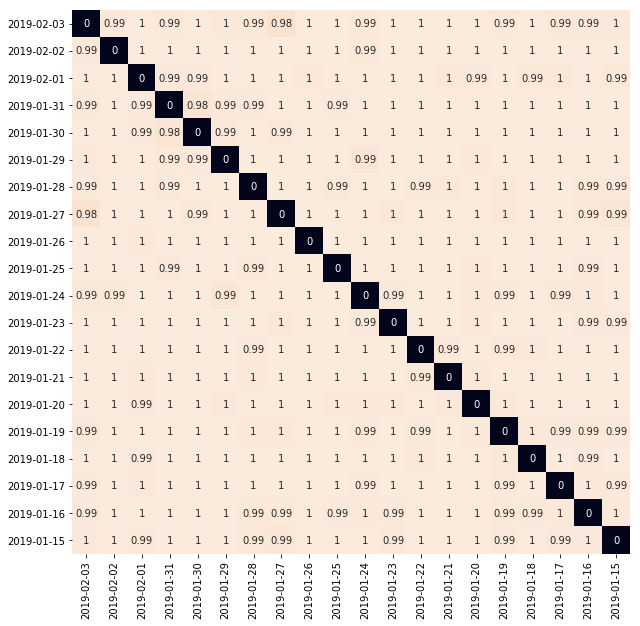

In [27]:
plt.figure(figsize=(10,10)) 
sns.heatmap(dist_readings, annot=True, cbar=False,xticklabels=df_readings.index[:20], 
            yticklabels=df_readings.index[:20])

## Tablica podobieństwa między tekstami czytań (EN)

In [28]:
ngram_vect_r_eng = CountVectorizer(ngram_range=(1,1), binary=True)

source='Ewangelia'

#sparse matrix
X_counts_r_eng = ngram_vect_r_eng.fit_transform(df_r_eng[source].apply(lambda x: clean_text(x)))

print("Wymiar tablicy dla tekstu {1}: {0} \n".format(X_counts_r_eng.shape, source))
print("20 pierwszych z {1} wszystkich możliwych n-gramów dla tekstu {2}:\n {0}".format(
ngram_vect_r_eng.get_feature_names()[:20],X_counts_r_eng.shape[1], source
))

Wymiar tablicy dla tekstu Ewangelia: (20, 646) 

20 pierwszych z 646 wszystkich możliwych n-gramów dla tekstu Ewangelia:
 ['abandoned', 'abiathar', 'able', 'absolute', 'accept', 'according', 'accuse', 'act', 'acted', 'added', 'advent', 'affected', 'allow', 'allowed', 'alone', 'along', 'alphaeus', 'already', 'also', 'amazed']


In [29]:
X_counts_r_df_eng = pd.DataFrame(X_counts_r_eng.toarray())
X_counts_r_df_eng.columns = ngram_vect_r_eng.get_feature_names()
X_counts_r_df_eng.head()

,abandoned,abiathar,able,absolute,accept,according,accuse,act,acted,added,...,would,wrapping,written,year,yet,yield,yielded,young,zajordania,zebedee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


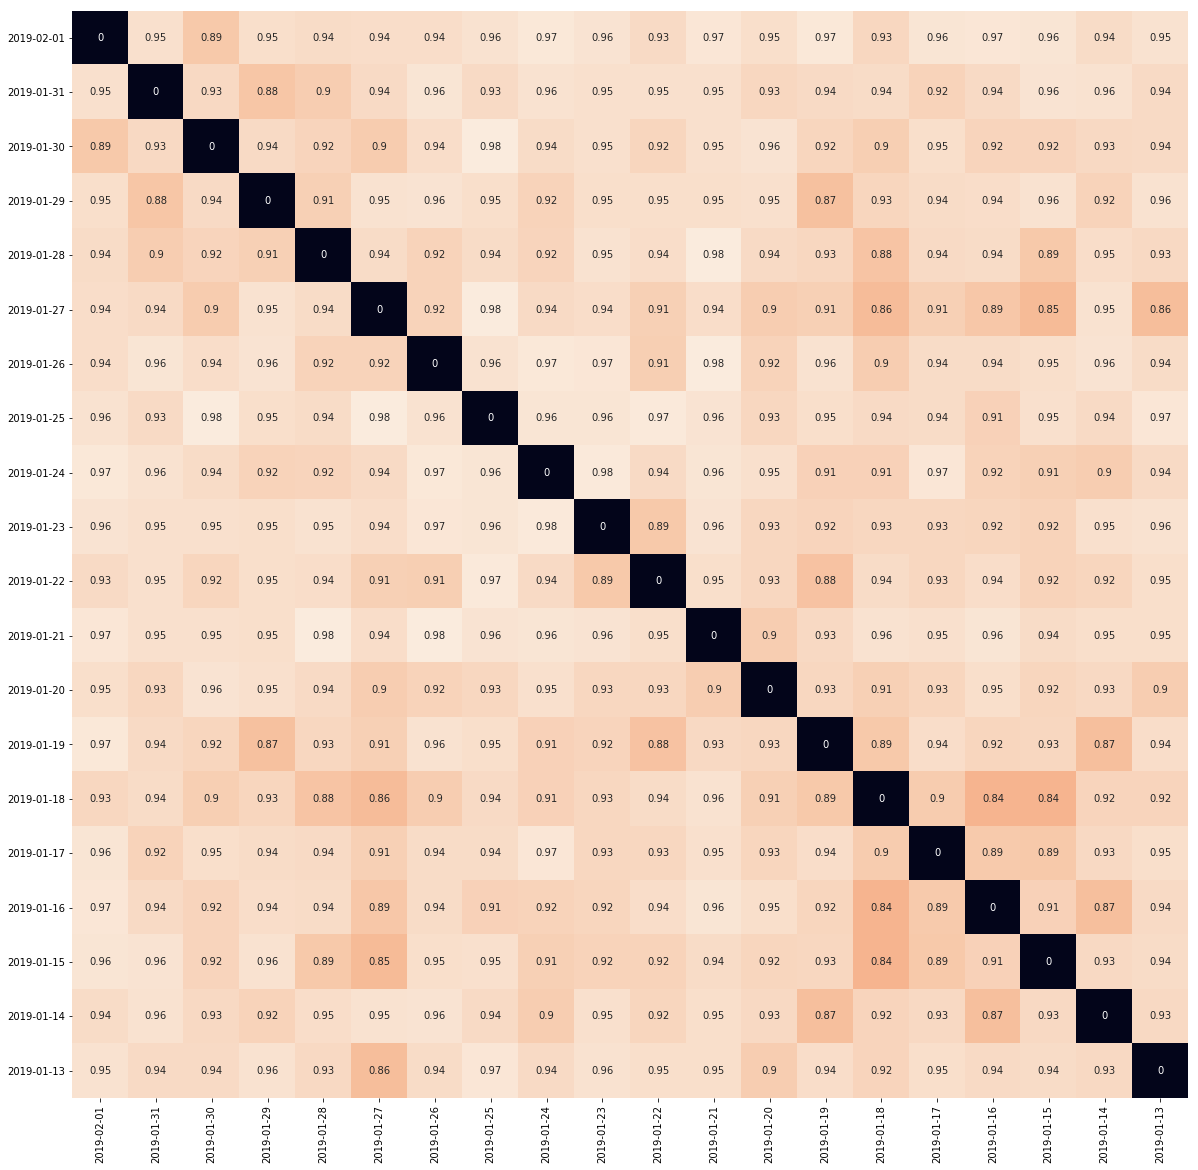

In [30]:
dist = DistanceMetric.get_metric('jaccard')
dist_r_eng = dist.pairwise(X_counts_r_df_eng.iloc[:][:])

plt.figure(figsize=(20,20)) 
sns.heatmap(dist_r_eng, annot=True, cbar=False,xticklabels=df_r_eng.index, 
            yticklabels=df_r_eng.index)

### TF - idf

In [32]:
def clean_text_TFIDF(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = lemmatizing(tokens)
    text = [word for word in tokens if word not in stopwords]
    return text

In [33]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text_TFIDF)
X_tfidf = tfidf_vect.fit_transform(df_r_eng['Ewangelia'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names()[:20])

(20, 648)
['', 'abandoned', 'abiathar', 'able', 'absolute', 'accept', 'according', 'accuse', 'act', 'acted', 'added', 'advent', 'affected', 'allow', 'allowed', 'alone', 'along', 'alphaeus', 'already', 'also']


In [34]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,,abandoned,abiathar,able,absolute,accept,according,accuse,act,acted,...,would,wrapping,written,year,yet,yield,yielded,young,zajordania,zebedee
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.098859,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.122509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.049657,0.000000,0.000000,0.000000,0.000000,0.110062,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055031,0.062605,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.102016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.104545,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.104545,0.091897,0.091897,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.103946,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.133346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155587,...,0.209168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155587,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140341,0.000000,0.000000,...,0.094336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
dist = (1 - cosine_similarity(X_tfidf)).round(2)

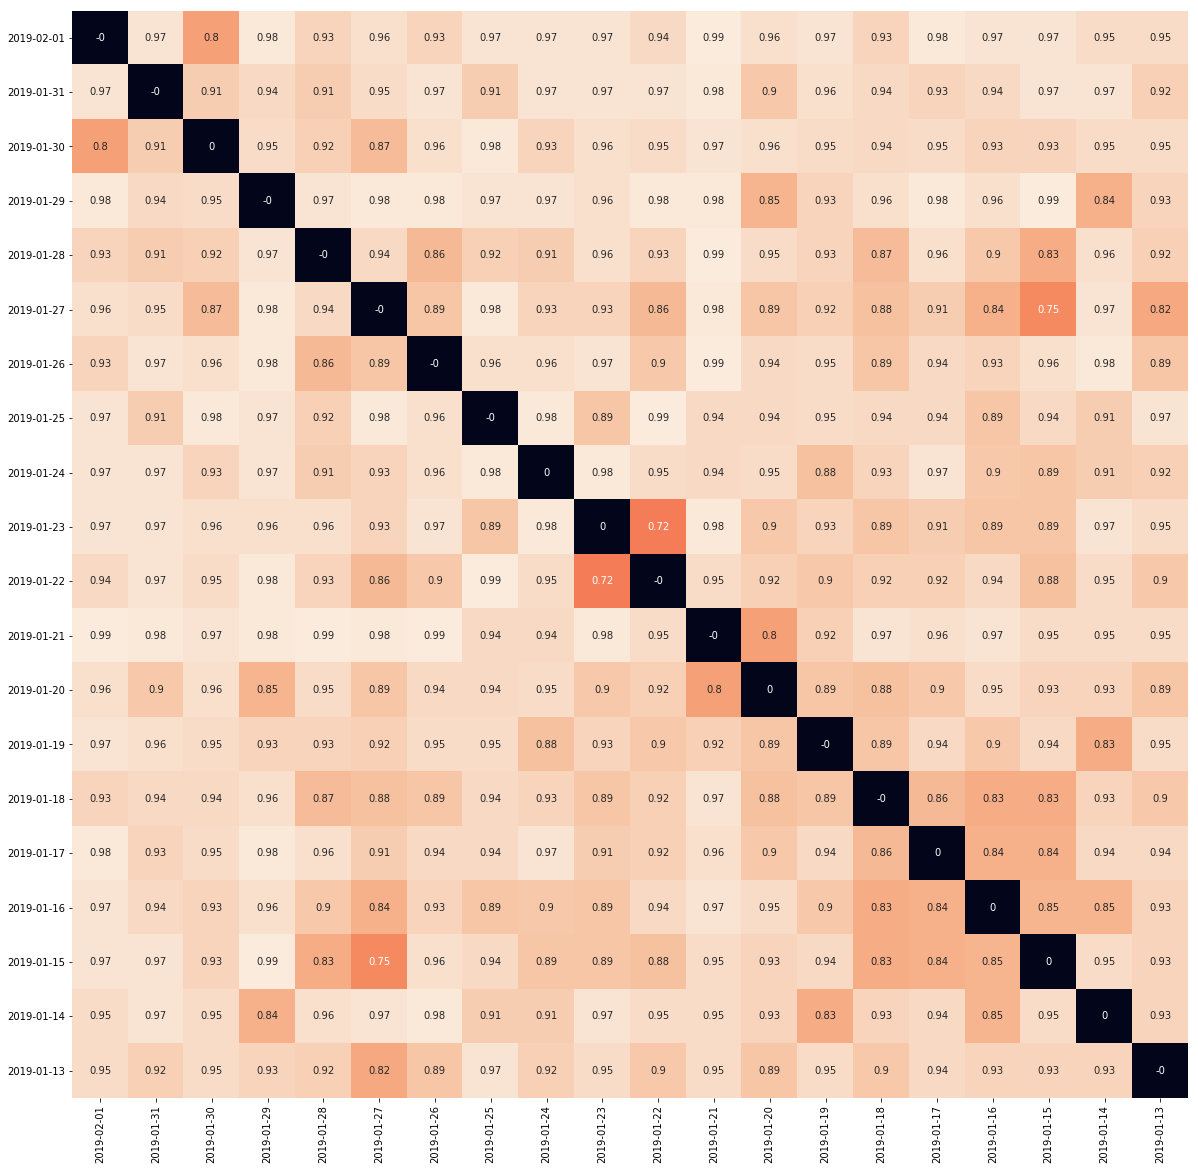

In [36]:
plt.figure(figsize=(20,20)) 
sns.heatmap(dist, annot=True, cbar=False,xticklabels=df_r_eng.index, 
            yticklabels=df_r_eng.index)

In [37]:
terms = tfidf_vect.get_feature_names()

### Dimensionality reduction
- PCA
- NMF

In [55]:
#sparse matrix
X_tfidf

<20x648 sparse matrix of type '<class 'numpy.float64'>'
	with 1154 stored elements in Compressed Sparse Row format>

#### Data Camp - NMF

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

#### Data Camp - recommender system using NMF and Cosine similarity

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

#### Data Camp - pipeline TruncatedSVD

In [59]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

    label  reading
13      0       13
12      0       12
3       0        3
11      0       11
18      0       18
8       0        8
0       1        0
10      1       10
9       1        9
6       1        6
19      1       19
5       2        5
4       2        4
14      2       14
15      2       15
16      2       16
17      2       17
2       3        2
1       3        1
7       3        7


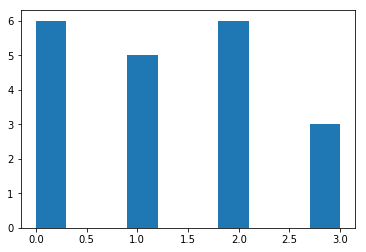

In [67]:
# Fit the pipeline to articles
pipeline.fit(X_tfidf)

# Calculate the cluster labels: labels
labels = pipeline.predict(X_tfidf)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'reading': np.arange(20)})

# Display df sorted by cluster label
print(df.sort_values('label'))
plt.hist(labels)
plt.show()

### Clustering

In [38]:
print(X_tfidf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04965711 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12964495 0.         ... 0.         0.         0.2592899 ]
 [0.         0.         0.         ... 0.0488457  0.         0.        ]]


In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer

In [40]:
scaler = StandardScaler()
scaler.fit(X_tfidf.toarray())
scaled = scaler.transform(X_tfidf.toarray())

In [41]:
normalizer = Normalizer()
normalizer.fit(X_tfidf.toarray())
normalized = normalizer.transform(X_tfidf.toarray())

In [42]:
X_tfidf_df.describe()

,,abandoned,abiathar,able,absolute,accept,according,accuse,act,acted,...,would,wrapping,written,year,yet,yield,yielded,young,zajordania,zebedee
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.013153,0.006482,0.007287,0.009425,0.005227,0.010700,0.013892,0.007017,0.002778,0.007779,...,0.030970,0.005227,0.009479,0.011922,0.004747,0.007695,0.003130,0.006878,0.007779,0.012964
std,0.034940,0.028989,0.032587,0.029119,0.023377,0.032950,0.062128,0.031381,0.012426,0.034790,...,0.062499,0.023377,0.029192,0.037750,0.021229,0.024727,0.013999,0.022136,0.034790,0.057979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.133346,0.129645,0.145734,0.102016,0.104545,0.110062,0.277843,0.140341,0.055569,0.155587,...,0.209168,0.104545,0.097691,0.146537,0.094938,0.098859,0.062605,0.088713,0.155587,0.259290


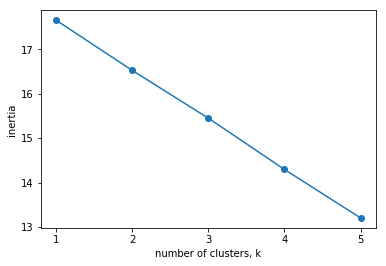

In [43]:
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_tfidf.toarray())
    #model.fit(X_tfidf.toarray()) #???
    inertias.append(model.inertia_)

    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [44]:
model = KMeans(n_clusters=4)
model.fit(X_tfidf.toarray())
centroids = model.cluster_centers_
clusters = model.labels_.tolist()

In [45]:
model.predict(X_tfidf.toarray())

array([1, 2, 1, 2, 1, 0, 0, 2, 0, 3, 3, 2, 2, 2, 1, 1, 1, 1, 2, 0])

20
[1, 2, 1, 2, 1, 0, 0, 2, 0, 3, 3, 2, 2, 2, 1, 1, 1, 1, 2, 0]



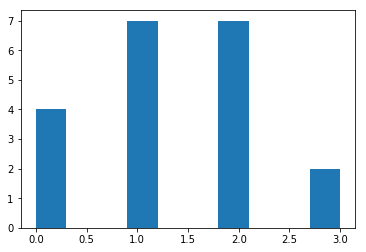

In [46]:
print(len(clusters))
print(clusters)
print()
plt.hist(clusters)
#plt.xticks(np.arange(0, 4, step=1),[0,1,2,3])
plt.show()

In [47]:
from sklearn.manifold import TSNE

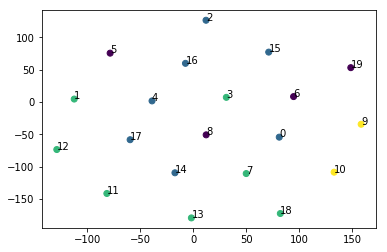

In [48]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X_tfidf.toarray())
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by clusters
plt.scatter(xs,ys,c=clusters)
for x, y, reading in zip(xs, ys, np.arange(20)):
    plt.annotate(reading, (x, y), fontsize=10, alpha=1)
#plt.legend()# TO FIX
plt.show()

#### Hierarchical method (agglomerative)

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram

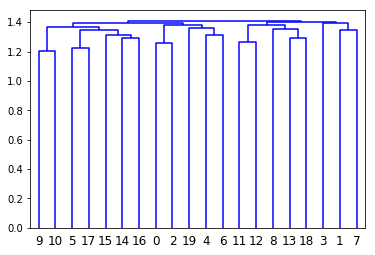

In [54]:
mergings = linkage(X_tfidf.toarray(), method='complete')
#print(mergings)
dendrogram(mergings)
plt.show()

In [ ]:
np.ndarray(15)

In [ ]:
X_tfidf.toarray()

In [69]:
print(df_r_eng.iloc[1][6] + '\n')
print(df_r_eng.iloc[7][6] + '\n')
print(df_r_eng.iloc[2][6])

Jesus said to the people, "Is this why light is brought in to put it under a bushel or under a bed, not in order to place it on a lampstand?" For there is nothing hidden that would not come to light. listen, let him listen! " And he said to them, "See what you are listening to. The same measure that you measure will measure you out and make it to you, because whoever has it will be added, and whoever does not will deprive him of what he has."

After his resurrection, Jesus appeared to the eleven and said to them, "Go into all the world and preach the gospel to every creature, whoever believes and receives the baptism will be saved, and whoever will not believe will be condemned. And those who believe will follow these signs. : In my name, the evil spirits will throw away, they will speak in new tongues, they will take snakes into their hands, and if they drink anything of a poison, they will not harm them, they will put their hands on the sick, and they will regain their health. "

Jes

## Tablica podobieństwa między piosenkami (PL)

In [24]:
ngram_vect_p = CountVectorizer(ngram_range=(1,1), binary=True)

source='Tekst'

X_counts_p = ngram_vect_p.fit_transform(df_songs[source].apply(lambda x: clean_text(x)))
print("Wymiar tablicy dla tekstu {1}: {0} \n".format(X_counts_p.shape, source))
print("20 pierwszych z {1} wszystkich możliwych n-gramów dla tekstu {2}:\n {0}".format(
ngram_vect_p.get_feature_names()[:20],X_counts_p.shape[1], source
))

Wymiar tablicy dla tekstu Tekst: (187, 2392) 

20 pierwszych z 2392 wszystkich możliwych n-gramów dla tekstu Tekst:
 ['abba', 'abrahama', 'abrahamowi', 'aby', 'abym', 'abyś', 'abyśmy', 'adonai', 'albowiem', 'ale', 'alleluja', 'amen', 'amor', 'ani', 'aniołami', 'aniołowie', 'anioły', 'aniołów', 'ave', 'aż']


In [25]:
X_counts_p_df = pd.DataFrame(X_counts_p.toarray())
X_counts_p_df.columns = ngram_vect_p.get_feature_names()
X_counts_p_df.head()

,abba,abrahama,abrahamowi,aby,abym,abyś,abyśmy,adonai,albowiem,ale,...,żywej,żywi,żywioły,żywota,żywy,żywym,żyć,żył,żyła,żyłby
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dist = DistanceMetric.get_metric('jaccard')
dist_songs = dist.pairwise(X_counts_p_df.iloc[:20][:])

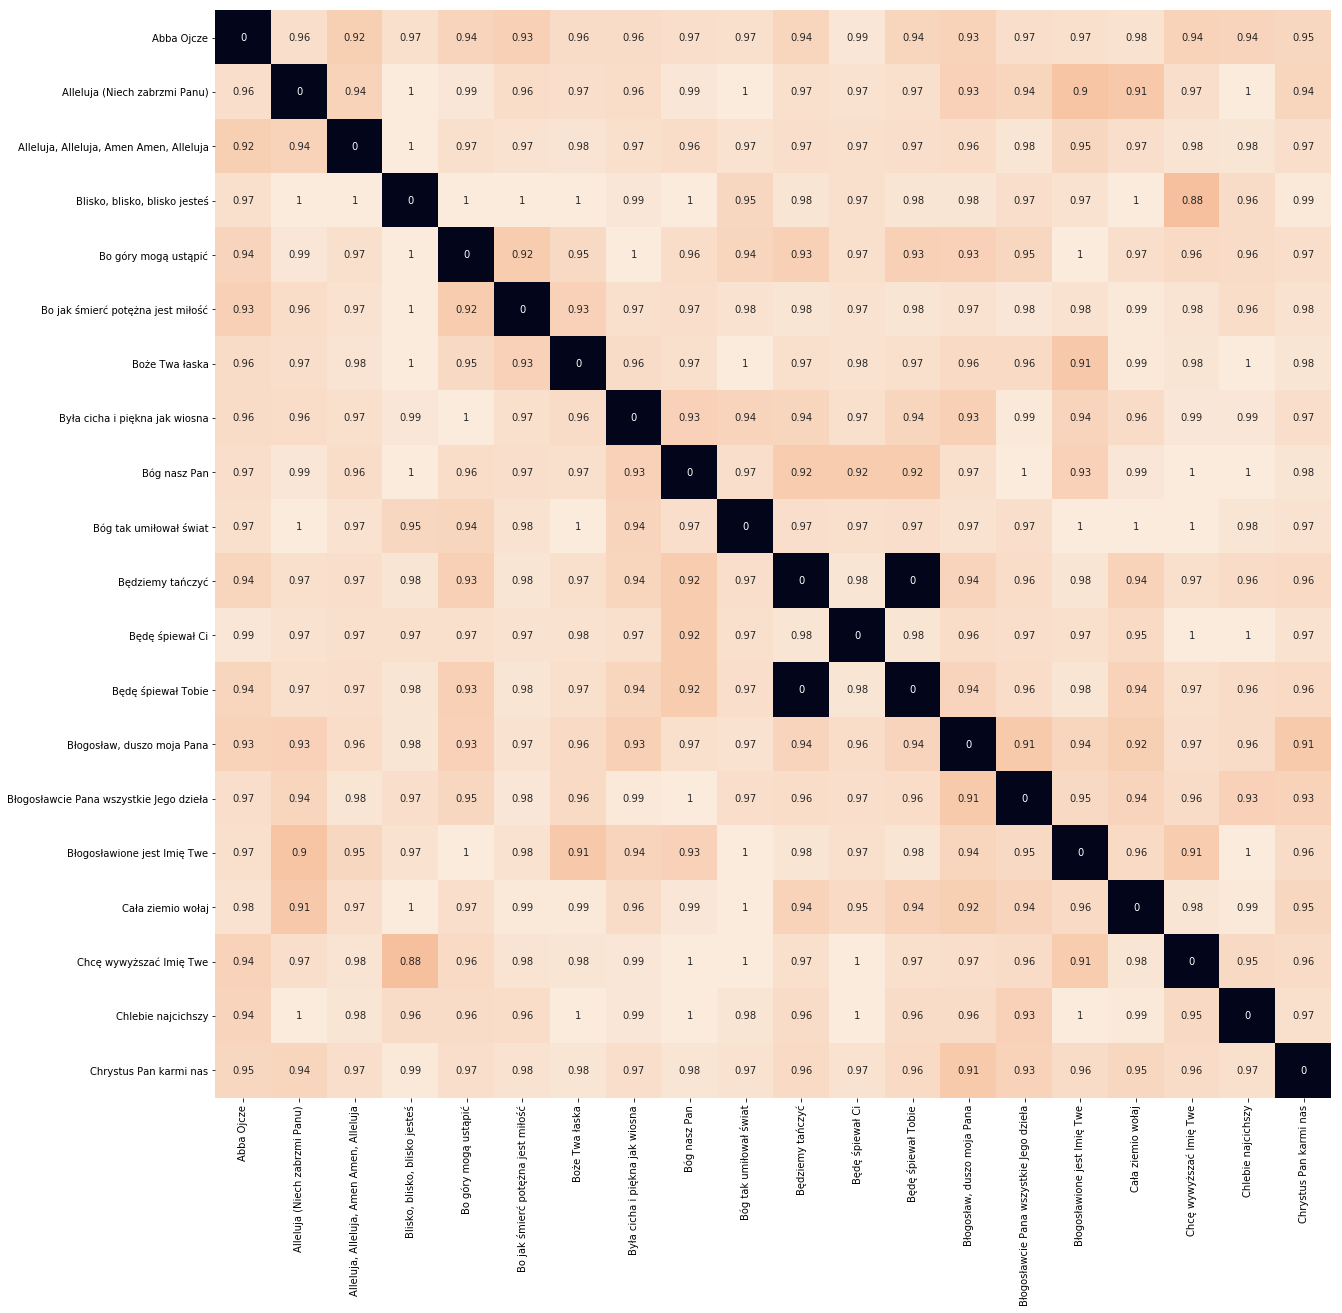

In [27]:
plt.figure(figsize=(20,20)) 
sns.heatmap(dist_songs, annot=True, cbar=False,xticklabels=df_songs['Tytuł'][:20], 
            yticklabels=df_songs['Tytuł'][:20])

## Tablica podobieństwa między piosenkami (ENG)

In [42]:
ngram_vect_p = CountVectorizer(ngram_range=(1,1), binary=True)

source='Eng'

X_counts_p = ngram_vect_p.fit_transform(df_songs[source].apply(lambda x: clean_text(x)))
print("Wymiar tablicy dla tekstu {1}: {0} \n".format(X_counts_p.shape, source))
print("20 pierwszych z {1} wszystkich możliwych n-gramów dla tekstu {2}:\n {0}".format(
ngram_vect_p.get_feature_names()[:20],X_counts_p.shape[1], source
))

Wymiar tablicy dla tekstu Eng: (187, 1168) 

20 pierwszych z 1168 wszystkich możliwych n-gramów dla tekstu Eng:
 ['abandoned', 'abba', 'abides', 'able', 'abraham', 'absorb', 'abundant', 'abyss', 'accelerate', 'accept', 'accepted', 'according', 'act', 'admiration', 'adonai', 'adoration', 'adore', 'adoringly', 'affirms', 'afraid']


In [43]:
X_counts_p_df = pd.DataFrame(X_counts_p.toarray())
X_counts_p_df.columns = ngram_vect_p.get_feature_names()
X_counts_p_df.head()

,abandoned,abba,abides,able,abraham,absorb,abundant,abyss,accelerate,accept,...,wrath,wreath,write,wrong,x2,year,youll,youth,zion,zither
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dist = DistanceMetric.get_metric('jaccard')
dist_songs = dist.pairwise(X_counts_p_df.iloc[:][:])

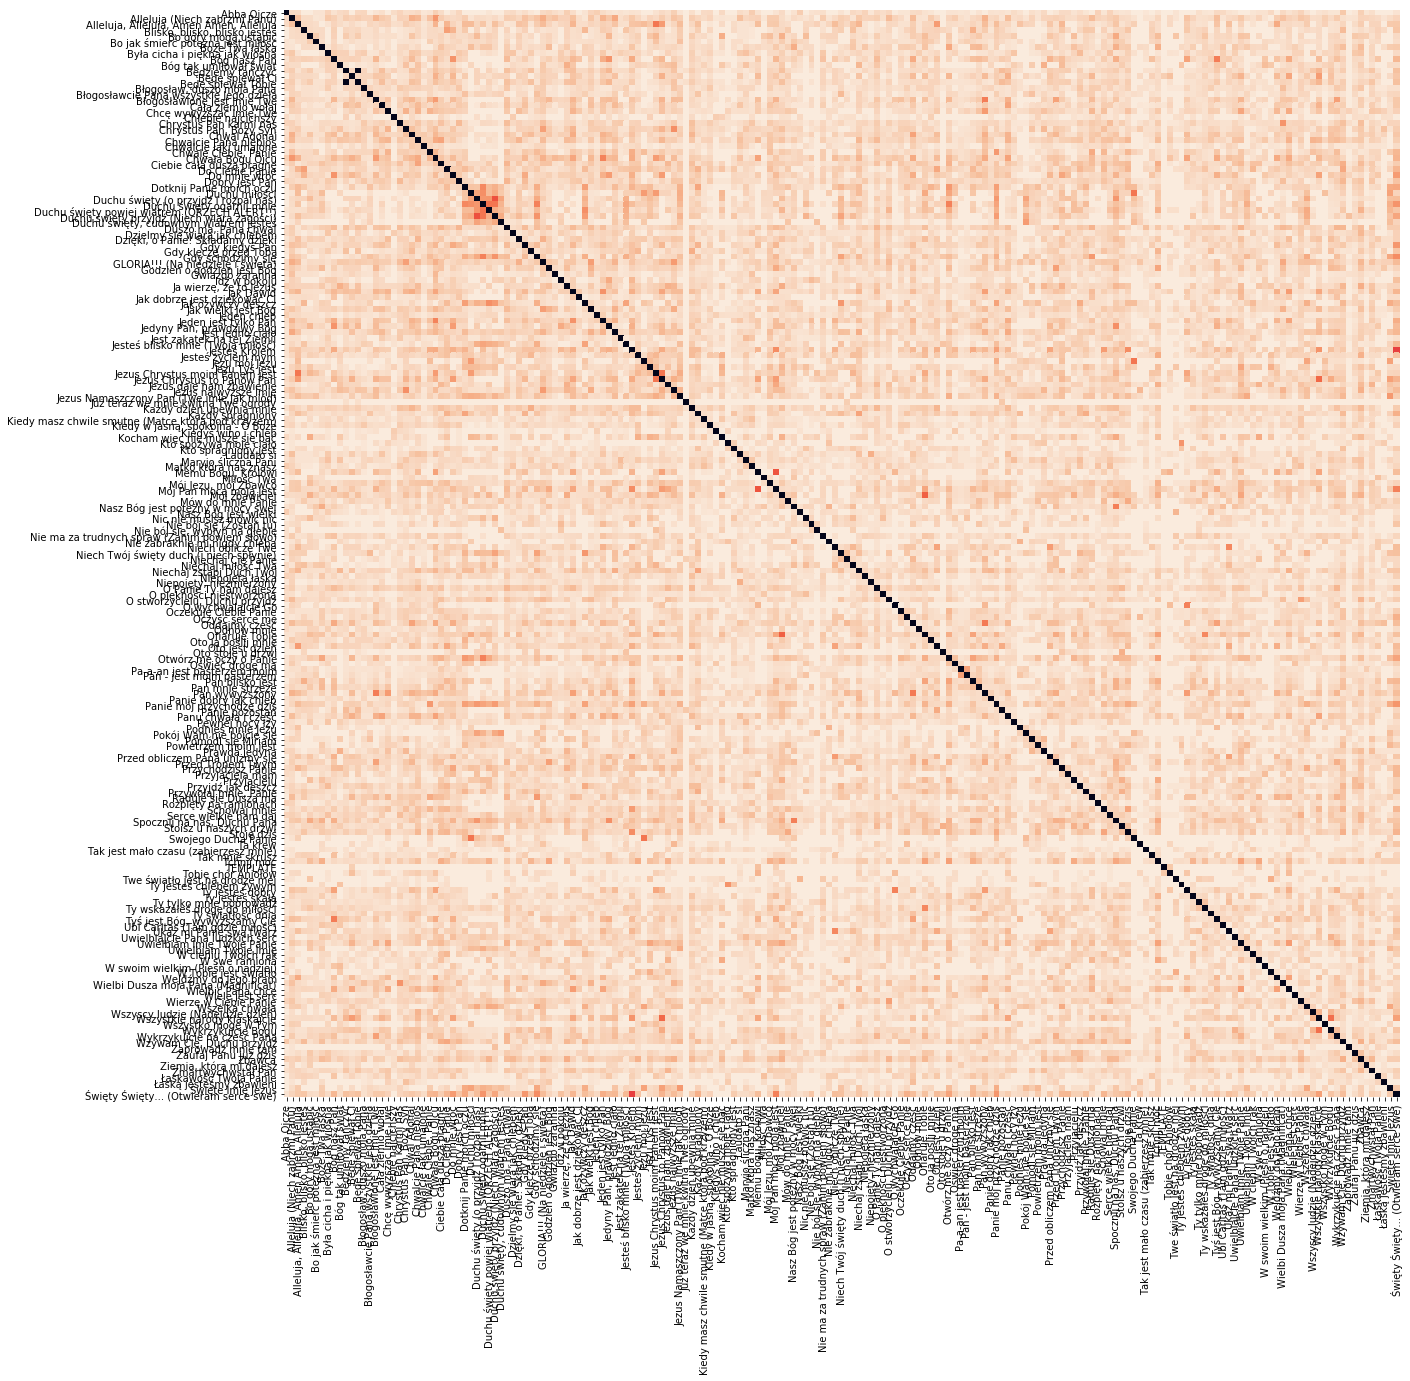

In [45]:
plt.figure(figsize=(20,20)) 
sns.heatmap(dist_songs, annot=False, cbar=False,xticklabels=df_songs['Tytuł'], 
            yticklabels=df_songs['Tytuł'])

## ROZSZERZENIE: Podobieństwo między czytaniami a piosenkami

In [ ]:
dist = DistanceMetric.get_metric('jaccard')
dist_mix = dist.pairwise(X_counts_r_df.iloc[:20][:],X_counts_p_df.iloc[:20][:])

In [ ]:
X_counts_r_df.iloc[:20][:].shape

In [ ]:
X_counts_p_df.iloc[:20][:].shape